## Poker Hand Evaluator

by dotdev

## Project Abstract

---------------------------------------------------------------------------------------------------------------------------------


For this project, I plan to calculate the odds of achieving any given hand in Poker and beating the dealer, specifically Texas Hold 'em in a scenario of 2 players, the player and the dealer.

The project will rely on conditional probability through combinatorial mathematics and evaluate the winning percentage of the player's hand through an Effective Value (EV) formula at every stage of the game:

***Pre-Flop or Draw***

***Post-Flop***

***Fourth Card***

***River***


The evaluation will be run based on the possible acheivable hands in poker, namely:

***High Card***

***Pair***

***Two Pair***

***Three-of-a-Kind***

***Straight***

***Flush***

***Full House***

***Four-of-a-Kind***

***Straight Flush***

***Royal Flush***

---------------------------------------------------------------------------------------------------------------------------------

For each applicable stage of the game, the data will display the possibility of achieving any given hand through bar graph.

The y-axis will represent the different possible hands to achieve as mentioned above, while the x-axis will represent the probability of hitting any of the possible hands, calculated conditionally based on the draw of the dealer.

For the purposes of this project, we will assume that the system will calculate the win percentage based on what the system can see, we want extensibility for any outside party to view the game to see and be fed calculations knowing each opponent's hand as well. We want to approach calculating probability given a continuous addition of information about a sample size **n** by running calculations based on missing cards from the deck. 

To note, we are only calculating the possibility of achieving any given hand and comparing that to the possibilities of the dealer as well, for the scope of these simulations, we will not factor in "kickers" or the ability to evaluate the winning hand with the highest drawn card as a tiebreaker, given matching best hands. In evaluating possible hands, we will assign points to each card, with any successful hand to evaluate to a higher point value than any non-hand would achieve. We will then sum the EV of both the player and the dealer as event space and calculate the winning percentage of player, giving us:

$$ \text{Percentage of Winning} = \frac{Player EV}{Player EV + Dealer EV} $$

To begin, we will import the packages needed to evaluate hands and display/plot the data visualization with matplotlib.

We will also import the random to allow for shuffling of the deck, math for combinatoric calculations, Counter to allow for easier counting of hand states and hand evaluations, and defaultdict during evalution for easy grouping of cards, allowing simpler same suit evaluations for flush-based hands, and lastly, we import combinations library for evaluation of hypothetical next hands.


In [162]:
import matplotlib.pyplot as plt
import random
import math
from collections import Counter
from collections import defaultdict
from itertools import combinations

In [ ]:
# Sample code for initializing class fields
# No need to run this code block
values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['H', 'D', 'C', 'S']
deck = [(v, s) for v in values for s in suits]
drawn_player = []
drawn_dealer = []
cards_on_table = []

Above is an example of how we will initialize the shared deck of 52 cards that a majority of the calculation will be done on, along with an empty list of drawn cards so we can track probabilities accurately.

To achieve a simpler method to track winning hands, we are using tuples that are made from a set of values and suits, achieving a suit for every value and combining those into a list of tuples to represent a **deck**.

There will also be a list of cards that are being drawn, so we can track the ability to flop, deal the fourth, and deal the river. 

This is so we cannot infinitely call deals and protects the integrity of the calculations, having the length of **cards_on_table** to always be less than or equal to 5.

We are also not considering any card that is not a face card as a High Card hit, we assume that the only way to win via High Card draw is to hit anything from Jack to Ace. (Jack, Queen, King, Ace)

### **Initialization of Poker Game**

---------------------------------------------------------------------------------------------------------------------------------


Below we will create a class PokerGame to encapsulate game logic and maintain correctness for any alteration of the deck, resetting everytime we run a new game.

The functions for calculation will be defined at the top of this notebook and will be recalled for each instance, to simulate each stage within the game.

We have functions within the game that will be able to be called in a specific order, according to each stage of the game. When we run the logic, there is validation to ensure that we are in the right stage before executing any related code.

In the initial draw, we make sure that the player is dealt first, then the dealer.

We ensure that the turn and the river are not able to be dealt if the flop has not been dealt, and in the same vein, the flop is not able to be dealt unless there are no cards on the table.

It is also validated that the player and the dealer are not able to draw their initial 2 cards if they already have any cards drawn.

In [197]:
class PokerGame:
    def __init__(self):
        self.values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        self.suits = ['H', 'D', 'C', 'S']
        self.deck = [(v, s) for v in self.values for s in self.suits]
        self.drawn_player = []
        self.drawn_dealer = []
        self.cards_on_table = []
        self.hand_data = {'High': 0, 'Pair': 0, '2Pair': 0, '3Kind': 0, 
                          'Str': 0, 'Flush': 0, 'FH': 0, '4Kind': 0, 
                          'SF': 0, 'RF': 0}

    def combination(self, n, k):
        return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

    def shuffle(self):
        random.shuffle(self.deck)

    def initial_draw_player(self):
        if len(self.drawn_player) == 0:
            for i in range(2):
                self.drawn_player.append(self.deck.pop())

    def initial_draw_dealer(self):
        if len(self.drawn_dealer) == 0:
            for i in range(2):
                self.drawn_dealer.append(self.deck.pop())

    def draw_initial_hands(self):
        self.initial_draw_player()
        self.initial_draw_dealer()
        self.calculate_preflop_percentage(self.drawn_player, self.drawn_dealer)

    def calculate_preflop_strength(self, hand):
        if self.has_pair(hand):
            return 3
        # Suited
        elif hand[0][1] == hand[1][1]:
            return 2
        # Assume high card value as lowest strength
        else:
            return 1

    def calculate_preflop_percentage(self, player_hand, dealer_hand):
        player_strength = self.calculate_preflop_strength(player_hand)
        dealer_strength = self.calculate_preflop_strength(dealer_hand)
        final_ev_player = player_strength / (player_strength + dealer_strength)
        final_ev_dealer = dealer_strength / (player_strength + dealer_strength)
        formated_res_player = "{:.1f}".format(final_ev_player * 100)
        formated_res_dealer = "{:.1f}".format(final_ev_dealer * 100)
        print("Player Win Percent:" + " " +  str(formated_res_player) + "%")
        print("Dealer Win Percent:" + " " +  str(formated_res_dealer) + "%")


    def initial_flop(self):
        if len(self.cards_on_table) == 0:
            for i in range(3):
                self.cards_on_table.append(self.deck.pop())
        print("Player Win Percent:" + " " +  str(self.calculate_win_percentage_player()) + "%")
        print("Dealer Win Percent:" + " " +  str(self.calculate_win_percentage_dealer()) + "%")
    
        self.update_hand_probabilities()

    def draw_fourth(self):
        if len(self.cards_on_table) == 3:
            self.cards_on_table.append(self.deck.pop())
        print("Player Win Percent:" + " " +  str(self.calculate_win_percentage_player()) + "%")
        print("Dealer Win Percent:" + " " +  str(self.calculate_win_percentage_dealer()) + "%")

        self.update_hand_probabilities()

    def draw_river(self):
        if len(self.cards_on_table) == 4:
            self.cards_on_table.append(self.deck.pop())

        player_strength = self.evaluate_final_hand(self.drawn_player)
        dealer_strength = self.evaluate_final_hand(self.drawn_dealer)

        if player_strength > dealer_strength:
            print("Player Win Percent: 100%")
            print("Dealer Win Percent: 0%")
        elif dealer_strength > player_strength:
            print("Player Win Percent: 0%")
            print("Dealer Win Percent: 100%")
        else:
            print("Player Win Percent: 50%")
            print("Dealer Win Percent: 50%")

# These are hard coded values that will need to be replaced by the inverse probability of each hitting each hand
    def calculate_hand_value(self, hand):
        if self.has_royal_flush(hand):
            return 10
        elif self.has_straight_flush(hand):
            return 9
        elif self.has_four_of_a_kind(hand):
            return 8
        elif self.has_full_house(hand):
            return 7
        elif self.has_flush(hand):
            return 6
        elif self.has_straight(hand):
            return 5
        elif self.has_three_of_a_kind(hand):
            return 4
        elif self.has_two_pair(hand):
            return 3
        elif self.has_pair(hand):
            return 2
        else:
            return 1

    def eval_hand(self, hand, cards_on_table, remaining_deck):
        EV_total = 0
        remaining_cards = len(remaining_deck)

        # All combinations of the next card (stage) from the remaining deck
        for next_card in combinations(remaining_deck, 1):
            hypothetical_hand = hand + list(next_card)
            full_hand = hypothetical_hand + cards_on_table

            hand_value = self.calculate_hand_value(full_hand)

            probability = 1 / self.combination(remaining_cards, 1)

            EV_total += probability * hand_value

        return EV_total
    
    def eval_hand_player(self):
        player_hand = self.drawn_player + self.cards_on_table
        return self.eval_hand(player_hand, self.cards_on_table, self.deck)

    def eval_hand_dealer(self):
        dealer_hand = self.drawn_dealer + self.cards_on_table
        return self.eval_hand(dealer_hand, self.cards_on_table, self.deck)

    def calculate_win_percentage_player(self):
        ev_player = self.eval_hand_player()
        ev_dealer = self.eval_hand_dealer()
        
        total_ev = ev_player + ev_dealer
        win_percentage = ev_player / total_ev if total_ev > 0 else 0
        return "{:.1f}".format(win_percentage * 100)
    
    def calculate_win_percentage_dealer(self):
        ev_player = self.eval_hand_player()
        ev_dealer = self.eval_hand_dealer()

        total_ev = ev_player + ev_dealer
        win_percentage = ev_dealer / total_ev if total_ev > 0 else 0
        return "{:.1f}".format(win_percentage * 100)
    
    def evaluate_final_hand(self, hand):
        combined_hand = hand + self.cards_on_table
        full_hand_value = self.calculate_hand_value(combined_hand)
        return full_hand_value


    # Credit to Brian Caffey for inspiration for the following functions
    # https://briancaffey.github.io/2018/01/02/checking-poker-hands-with-python.html/
    # And to the following StackOverflow post for the Ace-low straight flush special case
    # https://poker.stackexchange.com/questions/4350/can-an-ace-be-low-in-a-straight

    def has_royal_flush(self, hand):
        suit_groups = defaultdict(list)
        # Check for group of 5 cards in the same suit
        for card in hand:
            suit_groups[card[1]].append(card[0])

        royal_flush_set = set(self.values[-5:])  # Last five elements (10, J, Q, K, A)
        for suit, values in suit_groups.items():
            # Check if all royal flush cards are present
            if royal_flush_set.issubset(set(values)):
                return True
        return False

    def has_straight_flush(self, hand):
        suit_groups = defaultdict(list)
        for card in hand:
            suit_groups[card[1]].append(self.values.index(card[0]))

        # Check for valid straight flush in each suit_group
        for suit, ranks in suit_groups.items():
            # Check for Ace-low straight, if Ace is present then it can also be low
            if 12 in ranks:
                ranks.append(0)

            unique_ranks = sorted(set(ranks))

            for i in range(len(unique_ranks) - 4):
                if unique_ranks[i + 4] - unique_ranks[i] == 4:
                    return True
        return False

    def has_four_of_a_kind(self, hand):
        values = [card[0] for card in hand]
        value_counts = Counter(values)
        return 4 in value_counts.values()

    def has_full_house(self, hand):
        values = [card[0] for card in hand]
        value_counts = Counter(values)

        # Check for three of a kind and pair, check if they are different suits
        if self.has_three_of_a_kind(hand) and self.has_pair(hand):
            for suit, count in value_counts.items():
                if count == 3:
                    three_kind_suit = suit
                    break
            for suit, count in value_counts.items():
                if count == 2 and suit != three_kind_suit:
                    return True
        return False

    def has_flush(self, hand):
        suits = [card[1] for card in hand]
        suit_counts = Counter(suits)
        return 5 in suit_counts.values()

    def has_straight(self, hand):
        values = [card[0] for card in hand]
        rank_indices = [self.values.index(v) for v in values]
        # Check for Ace-low straight, if Ace is present then it can also be low
        if 12 in rank_indices:
            rank_indices.append(0)

        unique_indices = sorted(set(rank_indices))

        for i in range(len(unique_indices) - 4):
            if unique_indices[i + 4] - unique_indices[i] == 4:
                return True
        return False

    def has_three_of_a_kind(self, hand):
        values = [card[0] for card in hand]
        value_counts = Counter(values)
        return 3 in value_counts.values()

    def has_two_pair(self, hand):
        values = [card[0] for card in hand]
        value_counts = Counter(values)
        return len([v for v in value_counts.values() if v == 2]) == 2

    def has_pair(self, hand):
        values = [card[0] for card in hand]
        value_counts = Counter(values)
        return 2 in value_counts.values()

    def high_card(self, hand):
        values = [card[0] for card in hand]
        # index face_cards in order of value (Ace high)
        face_cards = ['A', 'K', 'Q', 'J']

        high_cards = [card for card in values if card in face_cards]
        if high_cards:
            return max(high_cards, key=lambda card: face_cards.index(card))
        else:
            return False
        

    # This section is to dynamically update the dictionary of hand probabilities
    # This will be used to plot the probabilities of each hand at each stage of 
    # the game we want to show the probability of achieving any hand
    # Only run on the player's hand, not the dealer's

    def update_hand_probabilities(self):
        self.hand_data['Pair'] = self.estimate_probability_of_pair(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['2Pair'] = self.estimate_probability_of_two_pair(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['3Kind'] = self.estimate_probability_of_three_kind(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['Str'] = self.estimate_probability_of_straight(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['Flush'] = self.estimate_probability_of_flush(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['FH'] = self.estimate_probability_of_full_house(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['SF'] = self.estimate_probability_of_straight_flush(self.drawn_player, self.cards_on_table, self.deck)
        self.hand_data['RF'] = self.estimate_probability_of_royal_flush(self.drawn_player, self.cards_on_table, self.deck)
        self.plot_probabilities()

    def estimate_probability_of_pair(self, hand, cards_on_table, remaining_deck):
        if self.has_pair(hand + cards_on_table):
            return 1.0

        pair_probability = 0.0
        for card in remaining_deck:
            if any(card[0] == existing_card[0] for existing_card in hand + cards_on_table):
                pair_probability += 1 / len(remaining_deck)
        return pair_probability
    
    def estimate_probability_of_two_pair(self, hand, cards_on_table, remaining_deck):
        if self.has_two_pair(hand + cards_on_table):
            return 1.0

        two_pair_probability = 0.0
        combined_hand = hand + cards_on_table
        value_counts = Counter(card[0] for card in combined_hand)

        if any(count >= 2 for count in value_counts.values()):
            for card in remaining_deck:
                hypothetical_hand = combined_hand + [card]
                if self.has_two_pair(hypothetical_hand):
                    two_pair_probability += 1 / len(remaining_deck)

        return two_pair_probability
    
    def estimate_probability_of_three_kind(self, hand, cards_on_table, remaining_deck):
        if self.has_three_of_a_kind(hand + cards_on_table):
            return 1.0
        
        three_kind_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_three_of_a_kind(hypothetical_hand):
                three_kind_probability += 1 / len(remaining_deck)

        return three_kind_probability

    def estimate_probability_of_straight(self, hand, cards_on_table, remaining_deck):
        if self.has_straight(hand + cards_on_table):
            return 1.0
        
        straight_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_straight(hypothetical_hand):
                straight_probability += 1 / len(remaining_deck)

        return straight_probability

    def estimate_probability_of_flush(self, hand, cards_on_table, remaining_deck):
        if self.has_flush(hand + cards_on_table):
            return 1.0
        
        flush_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_flush(hypothetical_hand):
                flush_probability += 1 / len(remaining_deck)

        return flush_probability

    def estimate_probability_of_full_house(self, hand, cards_on_table, remaining_deck):
        if self.has_full_house(hand + cards_on_table):
            return 1.0
        
        fh_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_full_house(hypothetical_hand):
                fh_probability += 1 / len(remaining_deck)

        return fh_probability

    def estimate_probability_of_straight_flush(self, hand, cards_on_table, remaining_deck):
        if self.has_straight_flush(hand + cards_on_table):
            return 1.0
        
        sf_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_straight_flush(hypothetical_hand):
                sf_probability += 1 / len(remaining_deck)

        return sf_probability

    def estimate_probability_of_royal_flush(self, hand, cards_on_table, remaining_deck):
        if self.has_royal_flush(hand + cards_on_table):
            return 1.0
        
        rf_probability = 0.0
        combined_hand = hand + cards_on_table

        for card in remaining_deck:
            hypothetical_hand = combined_hand + [card]
            if self.has_royal_flush(hypothetical_hand):
                rf_probability += 1 / len(remaining_deck)

        return rf_probability

    def plot_probabilities(self):
        hands = list(self.hand_data.keys())
        winning_odds = list(self.hand_data.values())

        plt.figure(figsize=(12, 7))
        plt.bar(hands, winning_odds, color='green', width=.8)
        plt.xlabel("Possible Hands")
        plt.ylabel("Odds of Achieving Hand")
        plt.show()

### **Case of Ace Low Straights**

---------------------------------------------------------------------------------------------------------------------------------

In the evaluation of hands, we are ranking 2-14 inclusively, but we need to catch the exception that Ace Low can still be considered a valid hand in a straight.

**Example:**

For the hand *[A, 2, 3, 4, 5]* we know that the Ace value by index is value 14, or 12 in a 0-12 scale. When we evaluate valid straights, we assume the assigned **A** is a high card, invalidating the hand as *[2, 3, 4, 5, A]*.

Now we need to catch that exception to validate the hand *[A, 2, 3, 4, 5]* with special cases for Ace-Low Straight in every hand that validates a Straight. (Straight, Straight Flush)

### **Calculation of probability to achieve any hand**

---------------------------------------------------------------------------------------------------------------------------------

In the instance of calculating the probability of hitting any hand, for the purposes of this simulation, we will factor in possible combinations of valid achievable hands given what the **system** sees as missing from the deck.

**For Example:**

We can know that the missing cards from the deck can factor into the ability to hit:

*If we draw 7 of Hearts, we know that the opponent cannot draw any hand that includes 7 of Hearts*.

### **Combinatorics of Evaluation Methods**

---------------------------------------------------------------------------------------------------------------------------------

For the purposes of the scope of the game, I believe it is prudent to document the current approach of combinatorial mathematics in the game engine and note improvments for the future to further align this engine with a larger scope.

Currently, we evaluate the hands combinatorially in the Post-Flop, and Post-Turn stages. We generate a hypothetical hand in the method that is used to evaluate the EV's that become summed and compared. We also use combinations to allow for extensibility when it comes to the scope, instead of evaluating just the next card, we can now adjust it to read for the next 2 unknown cards.

For the purposes of this, we simply iterate through the remaining deck.

It is clear that simply calculating the possibility of drawing a valid card to achieve a hand out the remaining deck is a simplification of true possibilities but there is much more work that does not seem plausible to achieve, given project timelines.

I am aware of the edge cases within this design.

***For Example:***

Currently, we do not evaluate the limited cards within a suit (for a flush) that must be calculated in the combinations rather than just the C(Remaining Deck, 1), we know that the more appropriate calculation must be more fleshed out to calculate how many of the same suit are remaining in the deck, then run the possibility of C(Remaining of Same Suit, 1). The reasoning behind this simplification is that to implement this effectively through all possible cases would be out of the scope of what is accomplishable given the current timeline.

### **Calculation of Winning Probabilities**

---------------------------------------------------------------------------------------------------------------------------------

For the instance of calculating winning probability, for ease of comparison and the lack of evaluating "kickers" in this simulation, we will follow a simple model of comparing the best possible hand that both players are able to create given the ***NEXT*** card that will be drawn on the table.

For Pre-Flop, we evaluate the EV of the 2-card hands

For Post-Flop, we calculate possible EV on the Turn

For Post-Turn, we calculate possible EV on the River

At Post-River, we calculate the EV based on all 7 cards available.



### **Plotting Data and Dynamic Updates**

---------------------------------------------------------------------------------------------------------------------------------

In the bottom section of the poker engine, there is implementation of a dynamically updated dictionary where we can update the running game based on the possibilities of hitting any given hand through simulating hand possibilites while factoring in the **next card**.

We update this bar graph by updating possibilities in the Post-Flop and Post-Turn stage, effectively analyzing any stage where there is an available **next card**.

There is no data for the Pre-Flop and Post-River as we are not considering the scope of three cards drawn at once, and we also do not need to factor in possible **next card** when all 7 cards are drawn in Post-River.


### **Below we will start with the first stage, the initial Draw or Pre-flop.**

---------------------------------------------------------------------------------------------------------------------------------

In this project, we will evaluate the initial 2-card hands through a specific criteria that assigns basic heirarchical values to calculate EV:

*Pair* worth value 3

*Suited* worth value 2

*High Card* worth value 1

We assume that Pair is the strongest hand possible here, with Suited cards having higher potential to draw into better hands later on in the game. Finally, we assume that High Card is the lowest value, as it does not have any direct correlation to achieving high EV hands. This compounds well with the scope of the project as we are not evaluating "kickers" as tiebreakers.





In [220]:
game = PokerGame()
game.shuffle()
game.draw_initial_hands()
print("Player Hand:" + " " + str(game.drawn_player))
print("Dealer Hand:" + " " + str(game.drawn_dealer))

Player Win Percent: 33.3%
Dealer Win Percent: 66.7%
Player Hand: [('2', 'C'), ('4', 'H')]
Dealer Hand: [('5', 'D'), ('J', 'D')]


### **Post-Flop**

---------------------------------------------------------------------------------------------------------

In the case of the Post-Flop, we follow our logic of creating simulations through combinatorial math that is described above. We calculate hands of the three cards on the table and the player's respective hands. We now total the EV of hypothetical **next** hands soley on the next card that will be drawn (in this case the turn). We now evaluate the winning percentages based on the aforementioned EV formula.

Player Win Percent: 50.0%
Dealer Win Percent: 50.0%


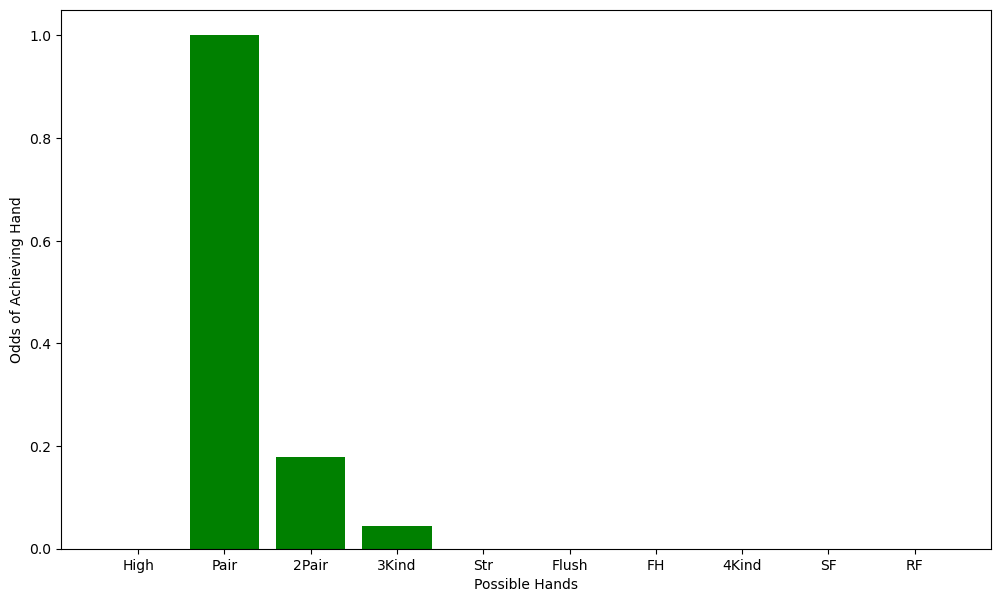

Cards on Table: [('Q', 'S'), ('2', 'D'), ('K', 'D')]
Player Hand: [('4', 'H'), ('2', 'C')]
Dealer Hand: [('3', 'D'), ('K', 'C')]


In [213]:
game.initial_flop()
print("Cards on Table:" + " " + str(game.cards_on_table))
print("Player Hand:" + " " + str(game.drawn_player))
print("Dealer Hand:" + " " + str(game.drawn_dealer))

### **The Turn or Fourth Card**

---------------------------------------------------------------------------------------------------------

For this stage, we follow the same logic as evaluting win percentage through cacluating EV through the aforementioned combinatorial process. We evaluate the hands and project hypothetical achieved hands through potential River draws.

Player Win Percent: 50.0%
Dealer Win Percent: 50.0%


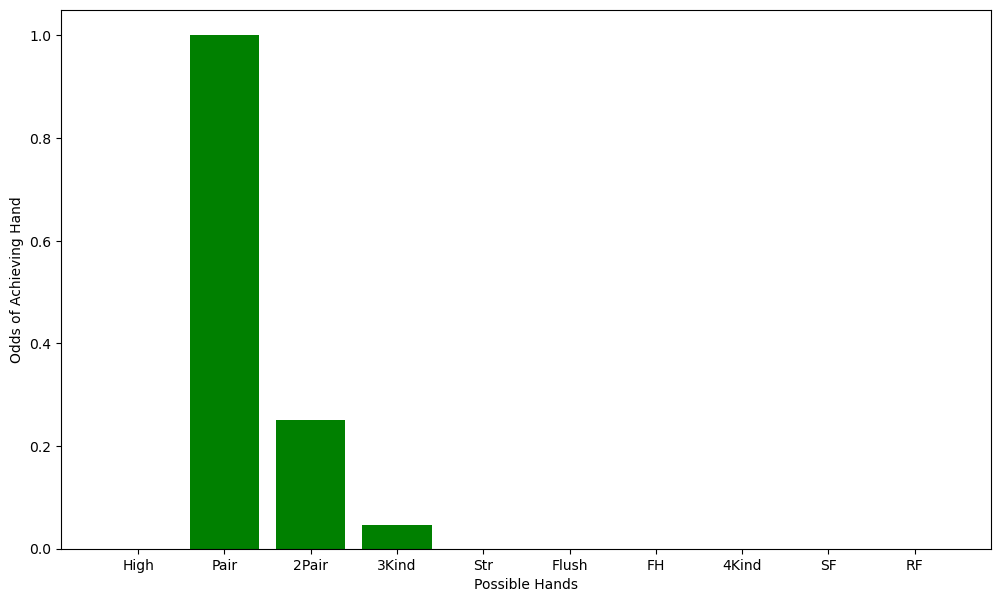

Cards on Table: [('Q', 'S'), ('2', 'D'), ('K', 'D'), ('A', 'H')]
Player Hand: [('4', 'H'), ('2', 'C')]
Dealer Hand: [('3', 'D'), ('K', 'C')]


In [214]:
game.draw_fourth()
print("Cards on Table:" + " " + str(game.cards_on_table))
print("Player Hand:" + " " + str(game.drawn_player))
print("Dealer Hand:" + " " + str(game.drawn_dealer))

### **The River or Fifth Card**

---------------------------------------------------------------------------------------------------------------------------------

In the case of the river, we need to change how we evaluate hands. We no longer want to process the combinatoric math for potential next cards as we have already drawn all possible cards.

This leads us to evaluate the strength of both 7 card hands, then returning the win percentage as 100% vs 0% in the case of a win. 

**Case of Tie**

In the case of a tie, we are not calculating the ability of "kickers" to reduce the scope of the simulation, for this case, if both hands are tied in EV, we will simply return a 50/50 and realize the end of the game as a tie.

In [205]:
game.draw_river()
print("Cards on Table:" + " " + str(game.cards_on_table))
print("Player Hand:" + " " + str(game.drawn_player))
print("Dealer Hand:" + " " + str(game.drawn_dealer))

Player Win Percent: 100%
Dealer Win Percent: 0%
Cards on Table: [('5', 'C'), ('3', 'D'), ('K', 'C'), ('6', 'D'), ('10', 'C')]
Player Hand: [('8', 'C'), ('5', 'S')]
Dealer Hand: [('Q', 'D'), ('A', 'S')]


### **Concluding Thoughts**

---------------------------------------------------------------------------------------------------------------------------------

In writing this engine, there were many assumptions broken, methods revised, and scope adjustments that needed to be made to accomplish the end goal. 

I thought that even with simplifying heuristics and reducing hypothetical simulations, we could achieve something close to a truly comprehensive game engine. I quickly realized as the work piled up that the ability for a one person team to achieve something would have been out of scope given my other responsibilities. I want to thank Professor Veliz for his guidance and the overwhelming popularity of this same idea in StackOverflow and the Python community for having many discussions and documentation for how to achieve hand classification and deck initialization.

I will conclude this project here as I have outlined and achieved all my goals for the time being. 

I have accomplished:

-Python Poker Game Engine

-Calculation of EV based on probabilities drawn from the remaining deck and the valiation of all 10 poker hands

-Plotting data based on hypothetical **next hands** and using that data to inform a dynamically updating bar graph at each applicable game stage

There are many things that I would like to revisit, now reflecting on the project. I want to accurately calculate probabilty beyond a 52-card deck, similar to how real casinos would deal their cards. To implement this I would need to dynamically update and track remaining valid cards within the cards in the deck/pool, use this dynamically updating data to inform combinatoric calculations. 

There is also the idea of making the entire thing playable, with more opponents, action/betting cycles, but I digreess. Thank you very much for reading!